<a href="https://colab.research.google.com/github/simrangaglani/CS---510-/blob/main/ReproducibleResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(dplyr)
library(ggplot2)
install.packages('GGally')
library(GGally)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [ ]:
install.packages("psych")
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [ ]:
# Introduction to your dataset and loading: 
# Source of the data where you download the data from
# Description of the dataset
# Load the dataset
# Data cleaning and preprocessing
# Handling missing values
life <- read.csv("/lifeExpect.csv")

In order to record and observe global health status, the Global Health Observatory (GHO) under the World Health Organization (WHO) collects information pertaining to population health and other factors on behalf of all countries to advance research on life expectancy.This data is shared to the public and sourced from the WHO website. The data is grouped by country, and contain other variables which describe the overall well-being and health of a population. 

•	country (Nominal): Country
•	year (Ordinal): Calendar year
•	status (Nominal): 'Developing' or 'Developed' 
•	life.expectancy (Ratio): Life expectancy in years 
•	adult.mortality (Ratio): Adult mortality rate per 1000  
•	infant.deaths (Ratio): Number of infant deaths per 1000 
•	alcohol (Ratio): Alcohol consumption rate 
•	percentage.expenditure (Ratio): Expenditure on health as a percentage of gdp
•	hepatitis.b (Ratio): Number of 1 year olds with Hepatitis B immunization
•	measles (Ratio): Number of reported Measles cases per 1000 
•	bmi (Interval/Ordinal): Average Body Mass Index (BMI) of population
•	under-five.deaths: number of people under the age of 5 deaths per 1000 
•	polio (Ratio): Number of 1 year olds with Polio immunization 
•	total.expenditure (Ratio): Government expenditure on health as a percentage of total government expenditure
•	diphtheria (Ratio): immunization rate of 1 year olds for Diphtheria 
•	hiv/aids (Ratio): Deaths per 1000 live births by HIV/AIDS for people under 5
•	gdp (Ratio): Gross Domestic Product per capita
•	population (Ratio): Population 
•	thinness.1-19.years (Ratio): Rate of thinness among people aged 10-19 
•	thinness.5-9.years (Ratio): Rate of thinness among people aged 5-9
•	income.composition.of.resources (Ratio): Income composition of resources 
•	schooling (Ratio): Average number of years of schooling

In [ ]:
glimpse(life)

Rows: 2,938
Columns: 22
$ Country                         <chr> "Afghanistan", "Afghanistan", "Afghani…
$ Year                            <int> 2015, 2014, 2013, 2012, 2011, 2010, 20…
$ Status                          <chr> "Developing", "Developing", "Developin…
$ Life.expectancy                 <dbl> 65.0, 59.9, 59.9, 59.5, 59.2, 58.8, 58…
$ Adult.Mortality                 <int> 263, 271, 268, 272, 275, 279, 281, 287…
$ infant.deaths                   <int> 62, 64, 66, 69, 71, 74, 77, 80, 82, 84…
$ Alcohol                         <dbl> 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.…
$ percentage.expenditure          <dbl> 71.279624, 73.523582, 73.219243, 78.18…
$ Hepatitis.B                     <int> 65, 62, 64, 67, 68, 66, 63, 64, 63, 64…
$ Measles                         <int> 1154, 492, 430, 2787, 3013, 1989, 2861…
$ BMI                             <dbl> 19.1, 18.6, 18.1, 17.6, 17.2, 16.7, 16…
$ under.five.deaths               <int> 83, 86, 89, 93, 97, 102, 106, 110, 113…
$ Polio         

In [ ]:
# Convert the data into the right type 
# Data coercion 
life <- life %>%
  mutate(Status = as.factor(Status))
glimpse(life)

#Data cleaning 
#missing values 
anyNA(life)
colSums(is.na(life))

#b/c of missing values, we will remove rows with missing data 
life_clean <- na.omit(life)
anyNA(life_clean)

summary(life_clean)

Rows: 2,938
Columns: 22
$ Country                         <chr> "Afghanistan", "Afghanistan", "Afghani…
$ Year                            <int> 2015, 2014, 2013, 2012, 2011, 2010, 20…
$ Status                          <fct> Developing, Developing, Developing, De…
$ Life.expectancy                 <dbl> 65.0, 59.9, 59.9, 59.5, 59.2, 58.8, 58…
$ Adult.Mortality                 <int> 263, 271, 268, 272, 275, 279, 281, 287…
$ infant.deaths                   <int> 62, 64, 66, 69, 71, 74, 77, 80, 82, 84…
$ Alcohol                         <dbl> 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.…
$ percentage.expenditure          <dbl> 71.279624, 73.523582, 73.219243, 78.18…
$ Hepatitis.B                     <int> 65, 62, 64, 67, 68, 66, 63, 64, 63, 64…
$ Measles                         <int> 1154, 492, 430, 2787, 3013, 1989, 2861…
$ BMI                             <dbl> 19.1, 18.6, 18.1, 17.6, 17.2, 16.7, 16…
$ under.five.deaths               <int> 83, 86, 89, 93, 97, 102, 106, 110, 113…
$ Polio         

[1] TRUE

Country                            Year 
                              0                               0 
                         Status                 Life.expectancy 
                              0                              10 
                Adult.Mortality                   infant.deaths 
                             10                               0 
                        Alcohol          percentage.expenditure 
                            194                               0 
                    Hepatitis.B                         Measles 
                            553                               0 
                            BMI               under.five.deaths 
                             34                               0 
                          Polio               Total.expenditure 
                             19                             226 
                     Diphtheria                        HIV.AIDS 
                             19                               0 
                            GDP                      Population 
                            448                             652 
           thinness..1.19.years              thinness.5.9.years 
                             34                              34 
Income.composition.of.resources                       Schooling 
                            167                             163

[1] FALSE

   Country               Year             Status     Life.expectancy
 Length:1649        Min.   :2000   Developed : 242   Min.   :44.0   
 Class :character   1st Qu.:2005   Developing:1407   1st Qu.:64.4   
 Mode  :character   Median :2008                     Median :71.7   
                    Mean   :2008                     Mean   :69.3   
                    3rd Qu.:2011                     3rd Qu.:75.0   
                    Max.   :2015                     Max.   :89.0   
 Adult.Mortality infant.deaths        Alcohol       percentage.expenditure
 Min.   :  1.0   Min.   :   0.00   Min.   : 0.010   Min.   :    0.00      
 1st Qu.: 77.0   1st Qu.:   1.00   1st Qu.: 0.810   1st Qu.:   37.44      
 Median :148.0   Median :   3.00   Median : 3.790   Median :  145.10      
 Mean   :168.2   Mean   :  32.55   Mean   : 4.533   Mean   :  698.97      
 3rd Qu.:227.0   3rd Qu.:  22.00   3rd Qu.: 7.340   3rd Qu.:  509.39      
 Max.   :723.0   Max.   :1600.00   Max.   :17.870   Max.   :18961.3

In [ ]:
# Define your final goal in this analysis and what problem you are trying 
# to solve. For example, you might want to build a predictive model to
# estimate an attribute using your data and a regression model, or a 
# classification problem, or you just want to discover novel insights 
# from your data using exploratory data analysis.


Life expectancy as a variable can highlight the health of a population. 
The analysis of population health over the course of 15 years (from 2000 - 2015) illustrates the overall behavior of life expectancy during that time. It can also be used to discover the status of which countries have low or high life expectancy. Farther analysis will showcase which variables impact life expectancy the most, and the relationship between gdp, schooling, and life expectancy.

In [ ]:
# Perform an exploratory data analysis:
# Visualize your data
# Distribution/histogram of fields in the dataset
# Plot some variables over the others. Do you see any interesting relationships?
# Correlation analysis
# What variables are more important in explaining your target variable?
# Principal component analysis
# Feature selection

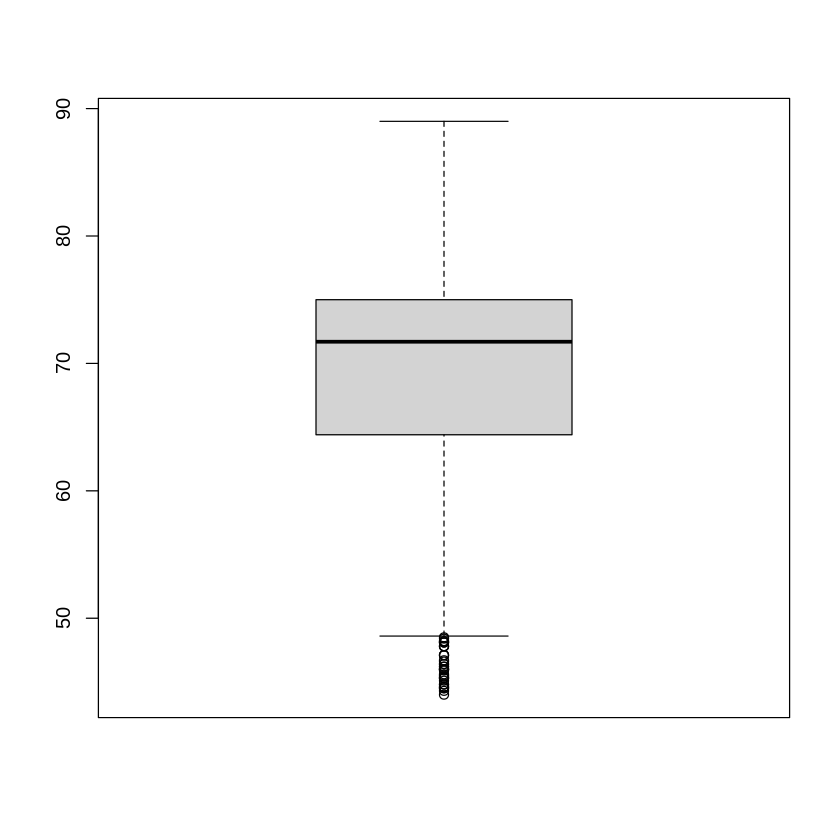

In [ ]:
outlier <- aggregate(Life.expectancy~Country, life_clean, mean)
# outlier[order(outlier$Life.expectancy, decreasing = T),]
# head(outlier[order(outlier$Life.expectancy, decreasing = T),])
outlier2 <- aggregate(Life.expectancy~Country, life_clean, sd)
# head(outlier2[order(outlier2$Life.expectancy, decreasing = T),])
boxplot(life_clean$Life.expectancy)

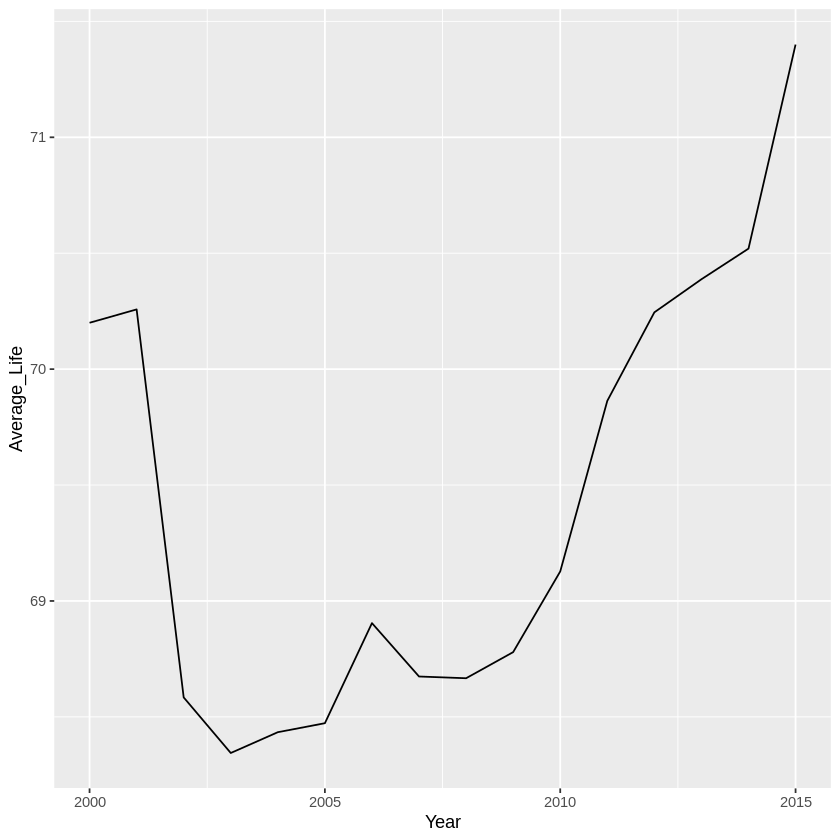

In [ ]:
life_change <- life_clean %>% 
  group_by(Year) %>% 
  summarise(Average_Life = mean(Life.expectancy)) %>% 
  ungroup()

ggplot(data = life_change, aes(x = Year, y = Average_Life))+
  geom_line()

From 2001 to 2003 life expectancy fell drastically, and from 2003 to 2015 life expectancy continued to increase

In [ ]:
group_by_country_avg_life <- life_clean %>% 
  group_by(Country) %>% 
  summarise(Average.Life.Expectancy = mean(Life.expectancy)) %>% 
  ungroup() 

ordered_avg_life <- group_by_country_avg_life %>% arrange(desc(Average.Life.Expectancy))
ten_highest_life_countires <- ordered_avg_life[1:10, ]
ten_highest_life_countires

ten_lowest_life_countries = tail(ordered_avg_life, n =10)
ten_lowest_life_countries

low_life_developing <- life_clean[life_clean$Country %in% c('Mozambique','Nigeria','Chad','Central African Republic','Swaziland','Angola','Malawi','Zimbabwe','Lesotho','Sierra Leone'),]
# head(low_life_developing)
filter(low_life_developing, Year ==2014)

Country,Average.Life.Expectancy
<chr>,<dbl>
Ireland,83.44000
Canada,82.23333
France,82.20667
Italy,82.15333
Spain,82.02000
Australia,81.90714
Sweden,81.90000
Austria,81.48000
Netherlands,81.32500


Country,Average.Life.Expectancy
<chr>,<dbl>
Mozambique,53.40714
Nigeria,52.84000
Chad,52.28571
Central African Republic,51.41667
Swaziland,50.82000
Angola,50.67500
Malawi,50.26154
Zimbabwe,49.38667
Lesotho,48.60833


Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
<chr>,<int>,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Angola,2014,Developing,51.7,348,67,8.33,23.965612,64,11699,⋯,68,3.31,64,2.0,479.31224,2692466,8.5,8.3,0.527,11.4
Central African Republic,2014,Developing,58.0,437,15,0.01,53.439643,47,210,⋯,47,4.20,47,4.5,377.13227,4515392,8.4,8.3,0.345,7.1
Chad,2014,Developing,52.6,362,46,0.01,11.302067,37,1275,⋯,44,3.62,37,2.9,125.99851,13569438,8.7,8.5,0.390,7.3
Lesotho,2014,Developing,52.1,522,4,0.01,162.127812,93,0,⋯,9,1.62,93,9.4,1174.83921,2145785,5.8,5.6,0.491,10.8
Malawi,2014,Developing,57.6,377,27,0.01,59.487449,91,3,⋯,87,11.38,91,5.1,354.72540,1768838,6.5,6.3,0.466,10.7
Mozambique,2014,Developing,56.7,375,61,0.01,54.911595,79,9,⋯,79,6.98,79,4.1,623.28711,27212382,3.6,3.5,0.409,9.1
Nigeria,2014,Developing,53.6,362,490,0.01,263.211103,49,6855,⋯,49,3.67,49,3.9,3221.67813,1764652,1.1,9.9,0.521,10.0
Sierra Leone,2014,Developing,48.1,463,23,0.01,1.443286,83,1006,⋯,83,11.90,83,0.6,78.43948,779162,7.5,7.4,0.426,9.5
Swaziland,2014,Developing,58.4,382,2,0.01,574.389510,98,0,⋯,98,9.25,98,7.3,3464.35169,129597,4.3,4.3,0.541,11.4


In the tables above, we can see that the top 10 countries with the highest and lowest life expectancies. Ireland is the country with the highest life expectancy. From the last/third table, we can see that countries with the lowest life expectancy all have the status of developing countries. Because we see a trend between developing countries and low life expectancy, we will explore how GDP impacts life expectancy.  

In [ ]:
highest_am <- life_clean %>% 
  group_by(Country) %>% 
  summarise(sum.of.as = sum(Adult.Mortality)) %>% 
  ungroup()

head(highest_am %>%  arrange(desc(sum.of.as)), 5)

Country,sum.of.as
<chr>,<int>
Zimbabwe,7062
Botswana,6914
Lesotho,6566
South Africa,6276
Malawi,5239


The country with the highest adult mortality is Zimbabwe 


In [ ]:
cor(life_clean$Life.expectancy, life_clean$GDP)

[1] 0.4413218

`geom_smooth()` using formula = 'y ~ x'


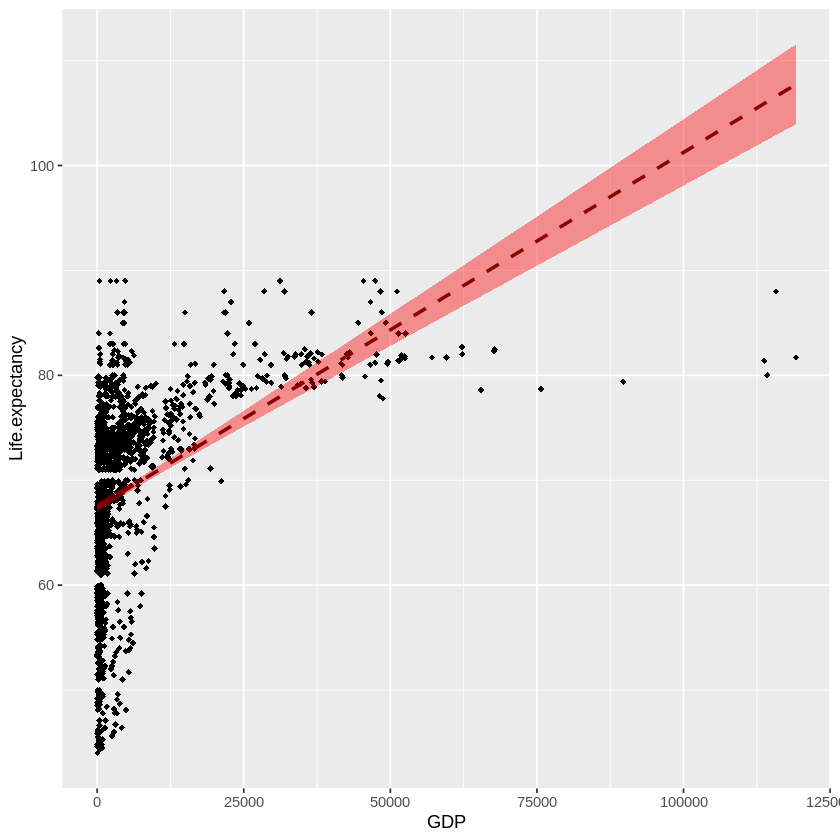

In [ ]:
ggplot(data = life_clean, aes(x = GDP, y = Life.expectancy))+
   geom_point(shape=18, color="black")+
        geom_smooth(method=lm, linetype="dashed",color="darkred", fill="red")

Within the graph and correlation value, we see GDP has a positive correlation with life expectancy, though not significant. 

In [ ]:
colnames(life_clean) 

[1] "Country"                         "Year"                           
 [3] "Status"                          "Life.expectancy"                
 [5] "Adult.Mortality"                 "infant.deaths"                  
 [7] "Alcohol"                         "percentage.expenditure"         
 [9] "Hepatitis.B"                     "Measles"                        
[11] "BMI"                             "under.five.deaths"              
[13] "Polio"                           "Total.expenditure"              
[15] "Diphtheria"                      "HIV.AIDS"                       
[17] "GDP"                             "Population"                     
[19] "thinness..1.19.years"            "thinness.5.9.years"             
[21] "Income.composition.of.resources" "Schooling"

Warning message in ggcorr(life_clean, label = T, size = 4):
“data in column(s) 'Country', 'Status' are not numeric and were ignored”


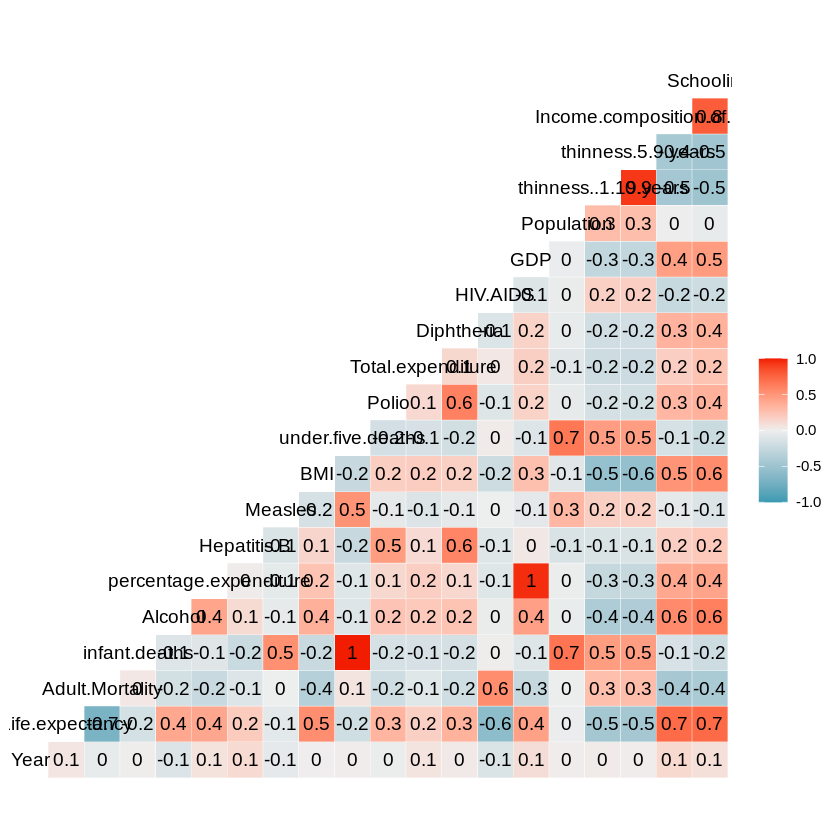

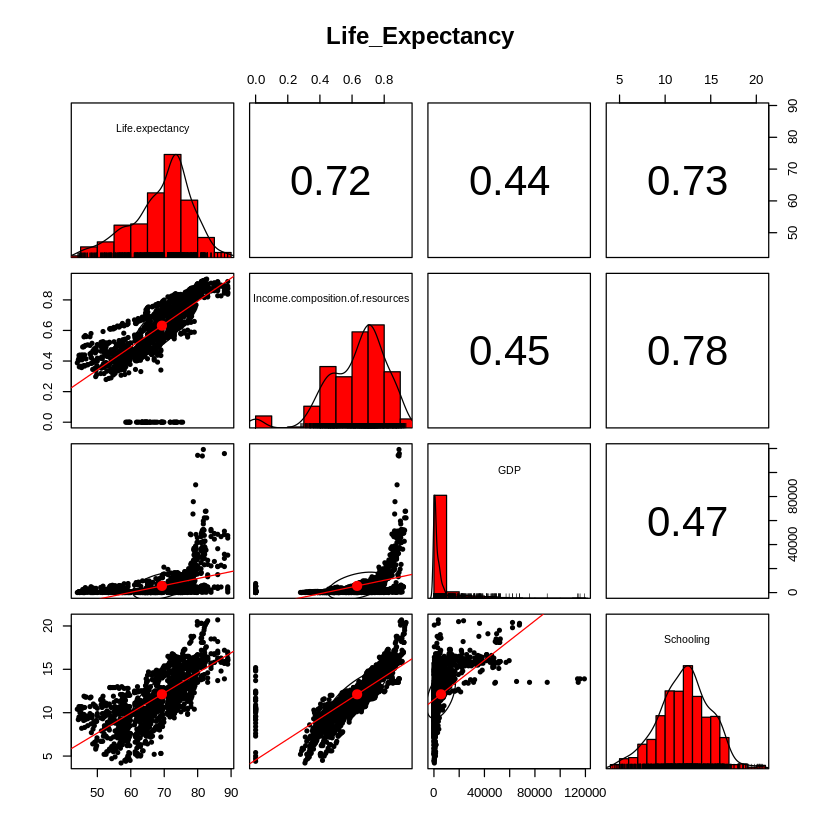

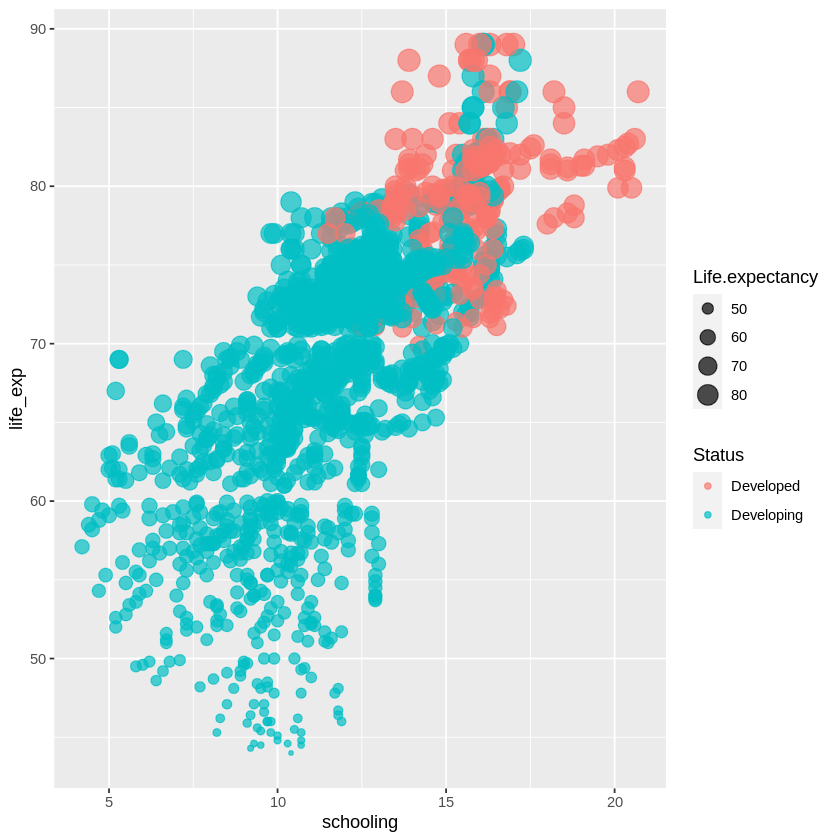

In [ ]:
ggcorr(life_clean, label = T, size =4)

four_att <- select(life_clean, Life.expectancy, Income.composition.of.resources, GDP, Schooling) 

# correlation matrix
pairs.panels(four_att[,1:4],
             method = "pearson", #correlation method
             hist.col = "red",
             main="Life_Expectancy",
             density = TRUE, 
             ellipses = TRUE, 
             lm=TRUE
             ) 

four_att2 <- select(life_clean, Life.expectancy,Status, GDP, Schooling) 

four_att2 %>%
  ggplot(aes(x=Schooling,y=Life.expectancy,color=Status, size=Life.expectancy))+
  geom_point(alpha=0.7)+xlab("schooling") +
  ylab("life_exp")+
  guides(fill = guide_legend(title = "status"))

The variables that are strongly correlated with life expectancy are Schooling and Income. Here we explore the relationship between schooling (education) and life expectancy. According to the graph, the more schooling recieved, the more life expectancy increases. It can also be seen that people with higher schooling and life expectancy live in developed countries. Now we explore how schooling may impact life expectancy through correlation

In [ ]:
print("Here is the correlation value between life expectancy and schooling: ")
cor(life_clean$Life.expectancy, life_clean$Schooling)

[1] "Here is the correlation value between life expectancy and schooling: "


[1] 0.72763

`geom_smooth()` using formula = 'y ~ x'


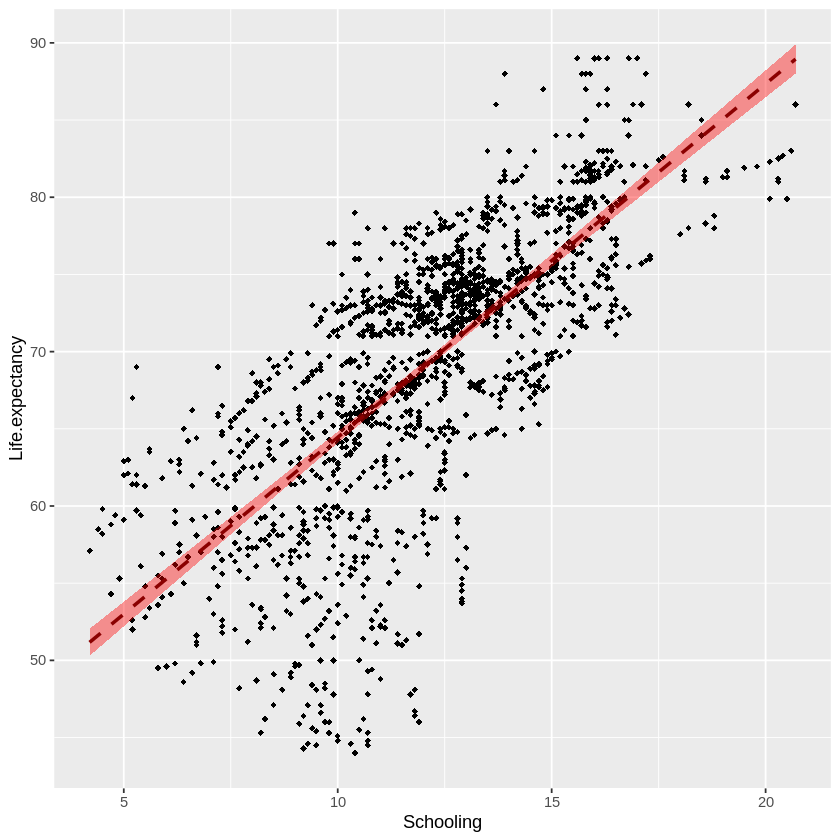

In [ ]:
ggplot(data = life_clean, aes(x = Schooling, y = Life.expectancy))+
   geom_point(shape=18, color="black")+
        geom_smooth(method=lm, linetype="dashed",color="darkred", fill="red")

Schooling has a significant and positive correlation with life expectancy. 